### Reinforcement_learning_in_clinical_medicine

In [18]:
install.package('DynTxRegime')
library(DynTxRegime)

Loading required package: modelObj



### Prepare the data

In [ ]:
url='https://raw.githubusercontent.com/wujinja-cgu/Reinforcement_learning_in_clinical_medicine/main/mydata_RL.csv'
mydata_RL=read.csv(url)
head(mydata_RL)

In [19]:
mydata_RL$A2=ifelse(mydata_RL$Stage2_input_4hourly>=median(mydata_RL$Stage2_input_4hourly),1,0)
mydata_RL$A2

[1] 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0
   [37] 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1 1 0
   [73] 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0
  [109] 1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0
  [145] 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1
  [181] 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1
  [217] 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 1 1
  [253] 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1
  [289] 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0
  [325] 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 1
  [361] 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0
  [397] 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0
  [433] 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1
  [469] 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0
  [505] 0 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1
  [541] 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0
  [577] 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0
  [613] 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1
  [649] 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0
  [685] 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0
  [721] 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1
  [757] 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1
  [793] 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0
  [829] 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1
  [865] 0 1 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0
  [901] 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0
  [937] 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0
  [973] 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0
 [1009] 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1
 [1045] 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0
 [1081] 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1
 [1117] 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 1
 [1153] 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1
 [1189] 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1
 [1225] 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0
 [1261] 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1
 [1297] 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1
 [1333] 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0
 [1369] 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0
 [1405] 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1
 [1441] 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0
 [1477] 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1
 [1513] 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1
 [1549] 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1
 [1585] 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1
 [1621] 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1
 [1657] 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1
 [1693] 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0
 [1729] 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 1
 [1765] 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1
 [18

In [25]:
moMain <- buildModelObj(model = ~ Stage1_GCS+
                      Stage1_HR+
                      Stage1_SysBP+
                      Stage1_MeanBP+
                      Stage1_DiaBP+
                      Stage1_RR+
                      Stage1_SpO2+
                      Stage1_Temp_C+
                      Stage1_FiO2+
                      Stage1_Potassium+
                      Stage1_Sodium+
                      Stage1_Chloride+
                      Stage1_Glucose+
                      Stage1_BUN+
                      Stage1_Creatinine+
                      Stage1_Magnesium+
                      Stage1_Calcium+
                      Stage1_Ionised_Ca+
                      Stage1_CO2_mEqL+
                      Stage1_SGOT+
                      Stage1_SGPT+
                      Stage1_Total_bili+
                      Stage1_Albumin+
                      Stage1_Hb+
                      Stage1_WBC_count+
                      Stage1_Platelets_count+
                      Stage1_PTT+
                      Stage1_PT+
                      Stage1_INR+
                      Stage1_Arterial_pH+
                      Stage1_paO2+
                      Stage1_paCO2+
                      Stage1_Arterial_BE+
                      Stage1_HCO3+
                      Stage1_Arterial_lactate+
                      Stage1_mechvent+
                      Stage1_Shock_Index+
                      Stage1_PaO2_FiO2+
                      Stage2_GCS+
                      Stage2_HR+
                      Stage2_SysBP+
                      Stage2_MeanBP+
                      Stage2_DiaBP+
                      Stage2_RR+
                      Stage2_SpO2+
                      Stage2_Temp_C+
                      Stage2_FiO2+
                      Stage2_Potassium+
                      Stage2_Sodium+
                      Stage2_Chloride+
                      Stage2_Glucose+
                      Stage2_BUN+
                      Stage2_Creatinine+
                      Stage2_Magnesium+
                      Stage2_Calcium+
                      Stage2_Ionised_Ca+
                      Stage2_CO2_mEqL+
                      Stage2_SGOT+
                      Stage2_SGPT+
                      Stage2_Total_bili+
                      Stage2_Albumin+
                      Stage2_Hb+
                      Stage2_WBC_count+
                      Stage2_Platelets_count+
                      Stage2_PTT+
                      Stage2_PT+
                      Stage2_INR+
                      Stage2_Arterial_pH+
                      Stage2_paO2+
                      Stage2_paCO2+
                      Stage2_Arterial_BE+
                      Stage2_HCO3+
                      Stage2_Arterial_lactate+
                      Stage2_mechvent+
                      Stage2_Shock_Index+
                      Stage2_PaO2_FiO2, 
                      solver.method = 'glm', 
                      solver.args = list('family'='binomial'),
                      predict.method = 'predict.glm',
                      predict.args = list(type='response'))

In [27]:
moCont <- buildModelObj(model = ~ Stage2_GCS+
                      Stage2_HR+
                      Stage2_SysBP+
                      Stage2_MeanBP+
                      Stage2_DiaBP+
                      Stage2_RR+
                      Stage2_SpO2+
                      Stage2_Temp_C+
                      Stage2_FiO2+
                      Stage2_Potassium+
                      Stage2_Sodium+
                      Stage2_Chloride+
                      Stage2_Glucose+
                      Stage2_BUN+
                      Stage2_Creatinine+
                      Stage2_Magnesium+
                      Stage2_Calcium+
                      Stage2_Ionised_Ca+
                      Stage2_CO2_mEqL+
                      Stage2_SGOT+
                      Stage2_SGPT+
                      Stage2_Total_bili+
                      Stage2_Albumin+
                      Stage2_Hb+
                      Stage2_WBC_count+
                      Stage2_Platelets_count+
                      Stage2_PTT+
                      Stage2_PT+
                      Stage2_INR+
                      Stage2_Arterial_pH+
                      Stage2_paO2+
                      Stage2_paCO2+
                      Stage2_Arterial_BE+
                      Stage2_HCO3+
                      Stage2_Arterial_lactate+
                      Stage2_mechvent+
                      Stage2_Shock_Index+
                      Stage2_PaO2_FiO2,
                      solver.method = 'glm', 
                      solver.args = list('family'='binomial'),
                      predict.method = 'predict.glm',
                      predict.args = list(type='response'))

In [28]:
y=mydata_RL[,'Stage2_mortality_90d']
y

[1] 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
   [37] 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   [73] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0
  [109] 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
  [145] 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0
  [181] 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0
  [217] 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0
  [253] 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
  [289] 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
  [325] 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1
  [361] 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
  [397] 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0
  [433] 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
  [469] 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1
  [505] 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0
  [541] 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
  [577] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0
  [613] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0
  [649] 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
  [685] 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0
  [721] 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
  [757] 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0
  [793] 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
  [829] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1
  [865] 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
  [901] 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
  [937] 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1
  [973] 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 [1009] 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 [1045] 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 [1081] 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1
 [1117] 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1
 [1153] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0
 [1189] 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0
 [1225] 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 [1261] 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0
 [1297] 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1
 [1333] 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 [1369] 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0
 [1405] 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 [1441] 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 [1477] 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1
 [1513] 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0
 [1549] 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1585] 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 [1621] 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 [1657] 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0
 [1693] 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 [1729] 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0
 [1765] 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 [18

In [29]:
mydata_RL$A2=as.factor(mydata_RL$A2)

In [30]:
fitSS <- qLearn(moMain = moMain,
                moCont = moCont,
                data = mydata_RL, 
                response = y,
                txName = "A2")

First step of the Q-Learning Algorithm.

Outcome regression.
Combined outcome regression model: ~ Stage1_GCS+Stage1_HR+Stage1_SysBP+Stage1_MeanBP+Stage1_DiaBP+Stage1_RR+Stage1_SpO2+Stage1_Temp_C+Stage1_FiO2+Stage1_Potassium+Stage1_Sodium+Stage1_Chloride+Stage1_Glucose+Stage1_BUN+Stage1_Creatinine+Stage1_Magnesium+Stage1_Calcium+Stage1_Ionised_Ca+Stage1_CO2_mEqL+Stage1_SGOT+Stage1_SGPT+Stage1_Total_bili+Stage1_Albumin+Stage1_Hb+Stage1_WBC_count+Stage1_Platelets_count+Stage1_PTT+Stage1_PT+Stage1_INR+Stage1_Arterial_pH+Stage1_paO2+Stage1_paCO2+Stage1_Arterial_BE+Stage1_HCO3+Stage1_Arterial_lactate+Stage1_mechvent+Stage1_Shock_Index+Stage1_PaO2_FiO2+Stage2_GCS+Stage2_HR+Stage2_SysBP+Stage2_MeanBP+Stage2_DiaBP+Stage2_RR+Stage2_SpO2+Stage2_Temp_C+Stage2_FiO2+Stage2_Potassium+Stage2_Sodium+Stage2_Chloride+Stage2_Glucose+Stage2_BUN+Stage2_Creatinine+Stage2_Magnesium+Stage2_Calcium+Stage2_Ionised_Ca+Stage2_CO2_mEqL+Stage2_SGOT+Stage2_SGPT+Stage2_Total_bili+Stage2_Albumin+Stage2_Hb+Stage2_WBC_co

In [31]:
A2Qlearn <- optTx(fitSS)$optimalTx

In [32]:
DTRstep(fitSS)

Q-Learning: step 1 


In [33]:
# Plots if defined by outcome regression method
dev.new()
par(mfrow = c(2,4))
plot(fitSS)
plot(fitSS, suppress = TRUE)

In [34]:
# Show main results of method
show(fitSS)

Q-Learning: step 1 
Outcome Regression Analysis
Combined 

Call:  glm(formula = YinternalY ~ Stage1_GCS + Stage1_HR + Stage1_SysBP + 
    Stage1_MeanBP + Stage1_DiaBP + Stage1_RR + Stage1_SpO2 + 
    Stage1_Temp_C + Stage1_FiO2 + Stage1_Potassium + Stage1_Sodium + 
    Stage1_Chloride + Stage1_Glucose + Stage1_BUN + Stage1_Creatinine + 
    Stage1_Magnesium + Stage1_Calcium + Stage1_Ionised_Ca + Stage1_CO2_mEqL + 
    Stage1_SGOT + Stage1_SGPT + Stage1_Total_bili + Stage1_Albumin + 
    Stage1_Hb + Stage1_WBC_count + Stage1_Platelets_count + Stage1_PTT + 
    Stage1_PT + Stage1_INR + Stage1_Arterial_pH + Stage1_paO2 + 
    Stage1_paCO2 + Stage1_Arterial_BE + Stage1_HCO3 + Stage1_Arterial_lactate + 
    Stage1_mechvent + Stage1_Shock_Index + Stage1_PaO2_FiO2 + 
    Stage2_GCS + Stage2_HR + Stage2_SysBP + Stage2_MeanBP + Stage2_DiaBP + 
    Stage2_RR + Stage2_SpO2 + Stage2_Temp_C + Stage2_FiO2 + Stage2_Potassium + 
    Stage2_Sodium + Stage2_Chloride + Stage2_Glucose + Stage2_BUN + 
    

In [35]:
# Show summary results of method
summary(fitSS)

$outcome
$outcome$Combined

Call:
glm(formula = YinternalY ~ Stage1_GCS + Stage1_HR + Stage1_SysBP + 
    Stage1_MeanBP + Stage1_DiaBP + Stage1_RR + Stage1_SpO2 + 
    Stage1_Temp_C + Stage1_FiO2 + Stage1_Potassium + Stage1_Sodium + 
    Stage1_Chloride + Stage1_Glucose + Stage1_BUN + Stage1_Creatinine + 
    Stage1_Magnesium + Stage1_Calcium + Stage1_Ionised_Ca + Stage1_CO2_mEqL + 
    Stage1_SGOT + Stage1_SGPT + Stage1_Total_bili + Stage1_Albumin + 
    Stage1_Hb + Stage1_WBC_count + Stage1_Platelets_count + Stage1_PTT + 
    Stage1_PT + Stage1_INR + Stage1_Arterial_pH + Stage1_paO2 + 
    Stage1_paCO2 + Stage1_Arterial_BE + Stage1_HCO3 + Stage1_Arterial_lactate + 
    Stage1_mechvent + Stage1_Shock_Index + Stage1_PaO2_FiO2 + 
    Stage2_GCS + Stage2_HR + Stage2_SysBP + Stage2_MeanBP + Stage2_DiaBP + 
    Stage2_RR + Stage2_SpO2 + Stage2_Temp_C + Stage2_FiO2 + Stage2_Potassium + 
    Stage2_Sodium + Stage2_Chloride + Stage2_Glucose + Stage2_BUN + 
    Stage2_Creatinine + Stage2_Magne

In [37]:
moPropen <- buildModelObj(model = ~ Stage2_GCS+
                      Stage2_HR+
                      Stage2_SysBP+
                      Stage2_MeanBP+
                      Stage2_DiaBP+
                      Stage2_RR+
                      Stage2_SpO2+
                      Stage2_Temp_C+
                      Stage2_FiO2+
                      Stage2_Potassium+
                      Stage2_Sodium+
                      Stage2_Chloride+
                      Stage2_Glucose+
                      Stage2_BUN+
                      Stage2_Creatinine+
                      Stage2_Magnesium+
                      Stage2_Calcium+
                      Stage2_Ionised_Ca+
                      Stage2_CO2_mEqL+
                      Stage2_SGOT+
                      Stage2_SGPT+
                      Stage2_Total_bili+
                      Stage2_Albumin+
                      Stage2_Hb+
                      Stage2_WBC_count+
                      Stage2_Platelets_count+
                      Stage2_PTT+
                      Stage2_PT+
                      Stage2_INR+
                      Stage2_Arterial_pH+
                      Stage2_paO2+
                      Stage2_paCO2+
                      Stage2_Arterial_BE+
                      Stage2_HCO3+
                      Stage2_Arterial_lactate+
                      Stage2_mechvent+
                      Stage2_Shock_Index+
                      Stage2_PaO2_FiO2, 
                      solver.method = 'glm',
                      solver.args = list('family'='binomial'),
                      predict.method = 'predict.glm',
                      predict.args = list(type='response'))

In [38]:
library(rpart)

In [39]:
moClass <- buildModelObj(model = ~ Stage2_GCS+
                      Stage2_HR+
                      Stage2_SysBP+
                      Stage2_MeanBP+
                      Stage2_DiaBP+
                      Stage2_RR+
                      Stage2_SpO2+
                      Stage2_Temp_C+
                      Stage2_FiO2+
                      Stage2_Potassium+
                      Stage2_Sodium+
                      Stage2_Chloride+
                      Stage2_Glucose+
                      Stage2_BUN+
                      Stage2_Creatinine+
                      Stage2_Magnesium+
                      Stage2_Calcium+
                      Stage2_Ionised_Ca+
                      Stage2_CO2_mEqL+
                      Stage2_SGOT+
                      Stage2_SGPT+
                      Stage2_Total_bili+
                      Stage2_Albumin+
                      Stage2_Hb+
                      Stage2_WBC_count+
                      Stage2_Platelets_count+
                      Stage2_PTT+
                      Stage2_PT+
                      Stage2_INR+
                      Stage2_Arterial_pH+
                      Stage2_paO2+
                      Stage2_paCO2+
                      Stage2_Arterial_BE+
                      Stage2_HCO3+
                      Stage2_Arterial_lactate+
                      Stage2_mechvent+
                      Stage2_Shock_Index+
                      Stage2_PaO2_FiO2,
                         solver.method = 'rpart',
                         solver.args = list(method="class"),
                         predict.args = list(type='class'))

In [40]:
fitSS_IPW <- optimalClass(moPropen = moPropen, 
                          moClass = moClass,
                          data = mydata_RL, 
                          response = y,
                          txName = 'A2')

IPW value estimator


First step of the Classification Algorithm.

Classification Perspective.




Propensity for treatment regression.
Regression analysis for moPropen:

Call:  glm(formula = YinternalY ~ Stage2_GCS + Stage2_HR + Stage2_SysBP + 
    Stage2_MeanBP + Stage2_DiaBP + Stage2_RR + Stage2_SpO2 + 
    Stage2_Temp_C + Stage2_FiO2 + Stage2_Potassium + Stage2_Sodium + 
    Stage2_Chloride + Stage2_Glucose + Stage2_BUN + Stage2_Creatinine + 
    Stage2_Magnesium + Stage2_Calcium + Stage2_Ionised_Ca + Stage2_CO2_mEqL + 
    Stage2_SGOT + Stage2_SGPT + Stage2_Total_bili + Stage2_Albumin + 
    Stage2_Hb + Stage2_WBC_count + Stage2_Platelets_count + Stage2_PTT + 
    Stage2_PT + Stage2_INR + Stage2_Arterial_pH + Stage2_paO2 + 
    Stage2_paCO2 + Stage2_Arterial_BE + Stage2_HCO3 + Stage2_Arterial_lactate + 
    Stage2_mechvent + Stage2_Shock_Index + Stage2_PaO2_FiO2, 
    family = "binomial", data = data)

Coefficients:
            (Intercept)               Stage2_GCS                Stage2_HR  
              7.170e+00                1.185e-02                3.689e-04  
           

In [41]:
library(rpart.plot)

Warning message:
"Cannot retrieve the data used to build the model (so cannot determine roundint and is.binary for the variables).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."


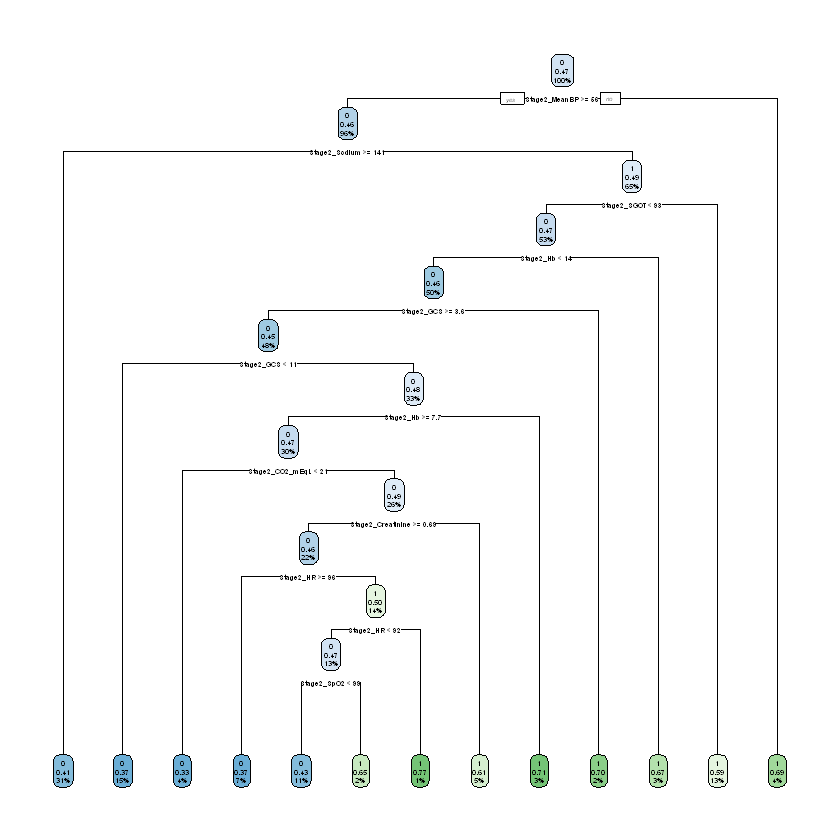

In [42]:
rpart.plot(classif(object = fitSS_IPW))

In [43]:
A2IPW <- optTx(fitSS_IPW)$optimalTx

In [44]:
moMain <- buildModelObj(model = ~ Stage1_GCS+
                      Stage1_HR+
                      Stage1_SysBP+
                      Stage1_MeanBP+
                      Stage1_DiaBP+
                      Stage1_RR+
                      Stage1_SpO2+
                      Stage1_Temp_C+
                      Stage1_FiO2+
                      Stage1_Potassium+
                      Stage1_Sodium+
                      Stage1_Chloride+
                      Stage1_Glucose+
                      Stage1_BUN+
                      Stage1_Creatinine+
                      Stage1_Magnesium+
                      Stage1_Calcium+
                      Stage1_Ionised_Ca+
                      Stage1_CO2_mEqL+
                      Stage1_SGOT+
                      Stage1_SGPT+
                      Stage1_Total_bili+
                      Stage1_Albumin+
                      Stage1_Hb+
                      Stage1_WBC_count+
                      Stage1_Platelets_count+
                      Stage1_PTT+
                      Stage1_PT+
                      Stage1_INR+
                      Stage1_Arterial_pH+
                      Stage1_paO2+
                      Stage1_paCO2+
                      Stage1_Arterial_BE+
                      Stage1_HCO3+
                      Stage1_Arterial_lactate+
                      Stage1_mechvent+
                      Stage1_Shock_Index+
                      Stage1_PaO2_FiO2+
                      Stage2_GCS+
                      Stage2_HR+
                      Stage2_SysBP+
                      Stage2_MeanBP+
                      Stage2_DiaBP+
                      Stage2_RR+
                      Stage2_SpO2+
                      Stage2_Temp_C+
                      Stage2_FiO2+
                      Stage2_Potassium+
                      Stage2_Sodium+
                      Stage2_Chloride+
                      Stage2_Glucose+
                      Stage2_BUN+
                      Stage2_Creatinine+
                      Stage2_Magnesium+
                      Stage2_Calcium+
                      Stage2_Ionised_Ca+
                      Stage2_CO2_mEqL+
                      Stage2_SGOT+
                      Stage2_SGPT+
                      Stage2_Total_bili+
                      Stage2_Albumin+
                      Stage2_Hb+
                      Stage2_WBC_count+
                      Stage2_Platelets_count+
                      Stage2_PTT+
                      Stage2_PT+
                      Stage2_INR+
                      Stage2_Arterial_pH+
                      Stage2_paO2+
                      Stage2_paCO2+
                      Stage2_Arterial_BE+
                      Stage2_HCO3+
                      Stage2_Arterial_lactate+
                      Stage2_mechvent+
                      Stage2_Shock_Index+
                      Stage2_PaO2_FiO2,
                      solver.method = 'glm', 
                      solver.args = list('family'='binomial'),
                      predict.method = 'predict.glm',
                      predict.args = list(type='response'))

In [45]:
moCont <- buildModelObj(model = ~ Stage2_GCS+
                      Stage2_HR+
                      Stage2_SysBP+
                      Stage2_MeanBP+
                      Stage2_DiaBP+
                      Stage2_RR+
                      Stage2_SpO2+
                      Stage2_Temp_C+
                      Stage2_FiO2+
                      Stage2_Potassium+
                      Stage2_Sodium+
                      Stage2_Chloride+
                      Stage2_Glucose+
                      Stage2_BUN+
                      Stage2_Creatinine+
                      Stage2_Magnesium+
                      Stage2_Calcium+
                      Stage2_Ionised_Ca+
                      Stage2_CO2_mEqL+
                      Stage2_SGOT+
                      Stage2_SGPT+
                      Stage2_Total_bili+
                      Stage2_Albumin+
                      Stage2_Hb+
                      Stage2_WBC_count+
                      Stage2_Platelets_count+
                      Stage2_PTT+
                      Stage2_PT+
                      Stage2_INR+
                      Stage2_Arterial_pH+
                      Stage2_paO2+
                      Stage2_paCO2+
                      Stage2_Arterial_BE+
                      Stage2_HCO3+
                      Stage2_Arterial_lactate+
                      Stage2_mechvent+
                      Stage2_Shock_Index+
                      Stage2_PaO2_FiO2,
                      solver.method = 'glm', 
                      solver.args = list('family'='binomial'),
                      predict.method = 'predict.glm',
                      predict.args = list(type='response'))

In [46]:
fitSS_AIPW <- optimalClass(moPropen = moPropen, 
                           moMain = moMain, 
                           moCont = moCont,
                           moClass = moClass,
                           data = mydata_RL, 
                           response = y,
                           txName = 'A2')

AIPW value estimator


First step of the Classification Algorithm.

Classification Perspective.




Propensity for treatment regression.
Regression analysis for moPropen:

Call:  glm(formula = YinternalY ~ Stage2_GCS + Stage2_HR + Stage2_SysBP + 
    Stage2_MeanBP + Stage2_DiaBP + Stage2_RR + Stage2_SpO2 + 
    Stage2_Temp_C + Stage2_FiO2 + Stage2_Potassium + Stage2_Sodium + 
    Stage2_Chloride + Stage2_Glucose + Stage2_BUN + Stage2_Creatinine + 
    Stage2_Magnesium + Stage2_Calcium + Stage2_Ionised_Ca + Stage2_CO2_mEqL + 
    Stage2_SGOT + Stage2_SGPT + Stage2_Total_bili + Stage2_Albumin + 
    Stage2_Hb + Stage2_WBC_count + Stage2_Platelets_count + Stage2_PTT + 
    Stage2_PT + Stage2_INR + Stage2_Arterial_pH + Stage2_paO2 + 
    Stage2_paCO2 + Stage2_Arterial_BE + Stage2_HCO3 + Stage2_Arterial_lactate + 
    Stage2_mechvent + Stage2_Shock_Index + Stage2_PaO2_FiO2, 
    family = "binomial", data = data)

Coefficients:
            (Intercept)               Stage2_GCS                Stage2_HR  
              7.170e+00                1.185e-02                3.689e-04  
           

Warning message:
"Cannot retrieve the data used to build the model (so cannot determine roundint and is.binary for the variables).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE."


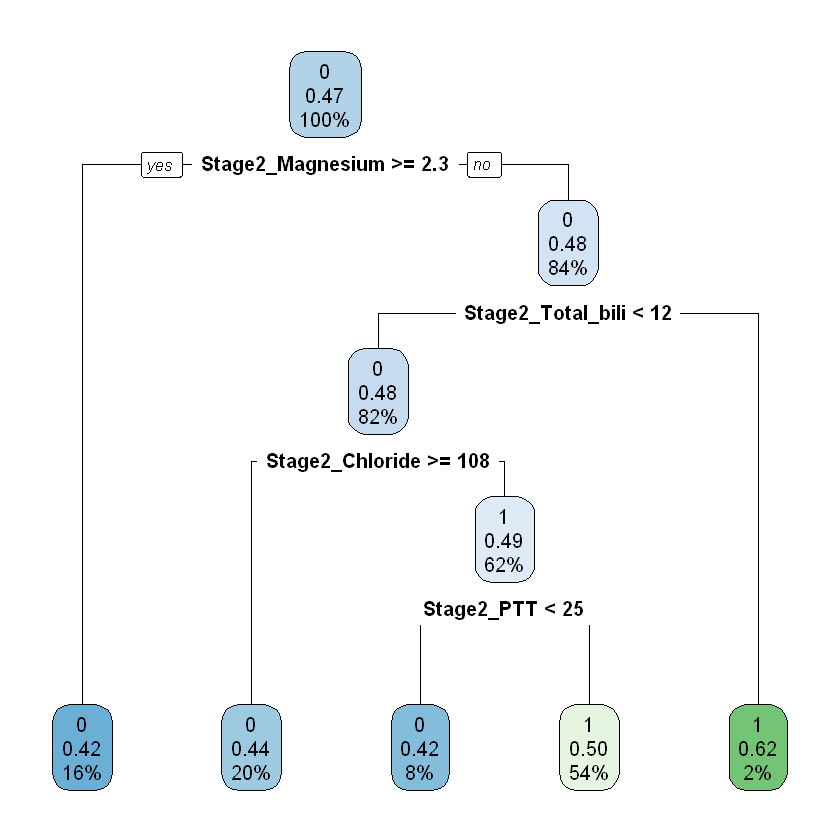

In [47]:
rpart.plot(classif(object = fitSS_AIPW))